In [58]:
import psycopg2 
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
#fechando conexão

con.close()

In [15]:
#importando flask

from flask import Flask, request

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


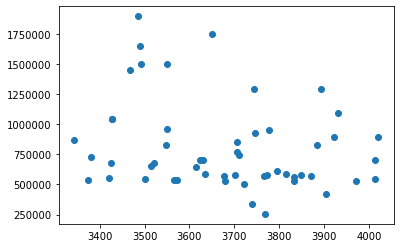

127.0.0.1 - - [09/Feb/2020 17:24:41] "GET /selecionar_area/3343/4021 HTTP/1.1" 200 -


In [72]:
#EXERCÍCIO

# Restaurar o banco imobiliária com arquivo imobiliaria.backup;
# ● Criar endpoint de get, que deve selecionar os dados dentro de um intervalo de area, plotar o gráfico de
# dispersão em que o eixo x é a área e o eixo y o preco e retornar o json com esses dados;
# ● Criar endpoint de get, que deve selecionar os 15 dados com maior preco em ordem decrescente, plotar o
# gráfico de linha em que o eixo x é o preco e o eixo y a qte_quartos e retornar o json com esses dados;
# ● Criar endpoint de get, que deve selecionar todos os dados com determinada quantidade de qte_banheiros,
# plotar o gráfico de barra em que o eixo x é o qte_banheiros e o eixo y a qte_quartos e retornar o json com
# esses dados;
# ● Criar endpoint de put, que atualize os dados pelo cep;
# ● Criar endpoint de delete, que delete os dados pelo cep;

con = psycopg2.connect(host='localhost', database='imobiliaria', user='postgres', password='postgres')
cur = con.cursor()

app = Flask(__name__)

@app.route("/selecionar_area/<min>/<max>", methods=['GET'])

def selecionar_area(min,max):
    query = "SELECT area, preco FROM info_casas WHERE area BETWEEN {min} AND {max};".format(min=min, max=max)
    
    df = pd.read_sql(query, con)
    plt.scatter(df.area, df.preco)
    plt.show()
    
    return df.to_json(orient='records'), 200

app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


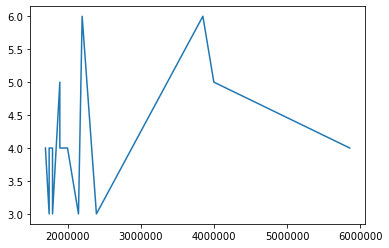

127.0.0.1 - - [07/Feb/2020 22:12:17] "GET /selecionar_maior_preco HTTP/1.1" 200 -


In [49]:
# ● Criar endpoint de get, que deve selecionar os 15 dados com maior preco em ordem decrescente, plotar o
# gráfico de linha em que o eixo x é o preco e o eixo y a qte_quartos e retornar o json com esses dados;

app = Flask(__name__)

@app.route("/selecionar_maior_preco", methods=['GET'])

def selecionar_area():
    query = "SELECT preco, qte_quartos FROM info_casas ORDER BY preco DESC LIMIT 15;"
    
    df = pd.read_sql(query, con)
    plt.plot(df.preco, df.qte_quartos)
    plt.show()
    
    return df.to_json(orient='records'), 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


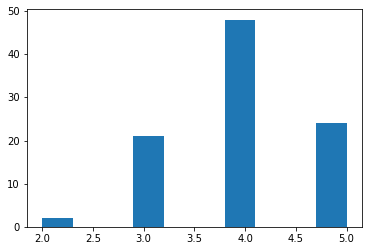

127.0.0.1 - - [07/Feb/2020 22:19:21] "GET /selecionar_qte_banheiros/3 HTTP/1.1" 200 -


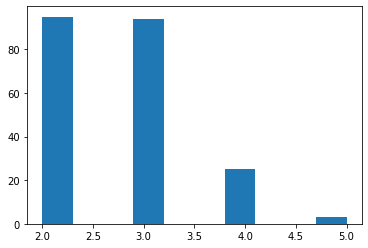

127.0.0.1 - - [07/Feb/2020 22:19:37] "GET /selecionar_qte_banheiros/2 HTTP/1.1" 200 -


In [54]:
# ● Criar endpoint de get, que deve selecionar todos os dados com determinada quantidade de qte_banheiros,
# plotar o gráfico de barra em que o eixo x é o qte_banheiros e o eixo y a qte_quartos e retornar o json com
# esses dados;

app = Flask(__name__)

@app.route("/selecionar_qte_banheiros/<n>", methods=['GET'])

def selecionar_qte_banheiros(n):
    query = "SELECT qte_banheiros, qte_quartos FROM info_casas WHERE qte_banheiros = {n};".format(n=n)
    
    df = pd.read_sql(query, con)
    plt.hist(df.qte_quartos)
    plt.show()
    
    return df.to_json(orient='records'), 200

app.run()

In [ ]:
# ● Criar endpoint de put, que atualize os dados pelo cep;


app = Flask(__name__)

@app.route("/atualizar_dado", methods=['PUT'])
def atualizar_dado():
    post_args = request.json

    if "qte_quartos" in post_args:
        query = "UPDATE info_casas SET qte_quartos = '{qte_quartos}' WHERE cep = {cep}".format(qte_quartos=post_args["qte_quartos"], cep=post_args["cep"])
        cur.execute(query)
    if "qte_banheiros" in post_args:
        query = "UPDATE info_casas SET qte_banheiros = '{qte_banheiros}' WHERE cep = {cep}".format(qte_banheiros=post_args["qte_banheiros"], cep=post_args["cep"])
        cur.execute(query)
    if "area" in post_args:
        query = "UPDATE info_casas SET area = '{area}' WHERE cep = {cep}".format(area=post_args["area"], cep=post_args["cep"])
        cur.execute(query)
    if "preco" in post_args:
        query = "UPDATE info_casas SET preco = '{preco}' WHERE cep = {cep}".format(preco=post_args["preco"], cep=post_args["cep"])
        cur.execute(query)
    con.commit()
    return "casa atualizada com sucesso!", 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2020-02-09 17:32:14,678] ERROR in app: Exception on /atualizar_dado [PUT]
Traceback (most recent call last):
  File "c:\users\rezen\appdata\local\programs\python\python37\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\rezen\appdata\local\programs\python\python37\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\rezen\appdata\local\programs\python\python37\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\rezen\appdata\local\programs\python\python37\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\rezen\appdata\local\programs\python\python37\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\rezen\appdata\

In [74]:
# ● Criar endpoint de delete, que delete os dados pelo cep;

app = Flask(__name__)

@app.route("/deletar_casa", methods=['DELETE'])
def deletar_casa():
    post_args = request.json
#     if "" not in post_args:
#         return "O cep não foi informado no dado recebido.", 400
    
    query = "DELETE FROM info_casas WHERE cep = {cep};".format(cep=post_args["cep"])
    cur.execute(query)
    con.commit()
    return "Casa deletada com sucesso!", 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Feb/2020 17:25:18] "DELETE /deletar_casa HTTP/1.1" 200 -
